In [1]:
# https://medium.com/@tomar.ankur287/user-user-collaborative-filtering-recommender-system-51f568489727

import pandas as pd
import numpy as np
import math

Ratings = pd.read_csv('data/parsed_combined_data_1.txt')
Ratings2 = pd.read_csv('data/parsed_combined_data_2.txt')
Ratings3 = pd.read_csv('data/parsed_combined_data_3.txt')
Ratings4 = pd.read_csv('data/parsed_combined_data_4.txt')


In [2]:
Ratings.columns = ['movieId', 'userId', 'rating', 'timestamp']
Ratings2.columns = ['movieId', 'userId', 'rating', 'timestamp']
Ratings3.columns = ['movieId', 'userId', 'rating', 'timestamp']
Ratings4.columns = ['movieId', 'userId', 'rating', 'timestamp']

In [3]:
Ratings = pd.concat([Ratings, Ratings2])
Ratings = pd.concat([Ratings, Ratings3])
Ratings = pd.concat([Ratings, Ratings4])

In [4]:
Ratings = Ratings[['movieId', 'userId', 'rating']]
Ratings.head()

,movieId,userId,rating
0,1,822109,5
1,1,885013,4
2,1,30878,4
3,1,823519,3
4,1,893988,3


In [32]:
RatingsTest = pd.read_csv('data/parsed_probe.txt')

In [33]:
RatingsTest.columns = ['movieId', 'userId']

In [34]:
df_all = Ratings[:500000].merge(RatingsTest, on=['movieId','userId'], 
                   how='left', indicator=True)

RatingsTrain = df_all[df_all['_merge'] == 'left_only']
RatingsTrain = RatingsTrain[['movieId', 'userId', 'rating']]
RatingsTrain

,movieId,userId,rating
0,1,822109,5
1,1,885013,4
2,1,30878,4
3,1,823519,3
4,1,893988,3
...,...,...,...
499995,148,1257939,5
499996,148,1700782,2
499997,148,380354,1
499998,148,753663,4


In [35]:
RatingsTrain = pd.concat([RatingsTrain, Ratings[500001:]])

In [36]:
print(len(Ratings)-len(RatingsTrain))
print(len(RatingsTest))

14763
1408394


In [29]:
print(len(np.unique(Ratings['userId'])))
print(len(np.unique(Ratings['movieId'])))

480189
17770


In [6]:
import statistics
ratings_per_user = Ratings.groupby('userId')['rating'].count()
statistics.mean(ratings_per_user.tolist())

209.2519882796149

<AxesSubplot:>

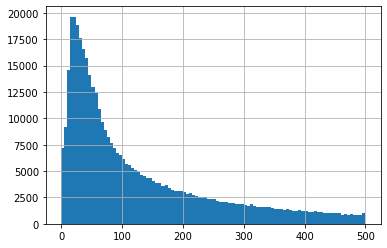

In [8]:
import matplotlib.pyplot as plt
# %matplotlib inline
ratings_per_user.hist(bins=100, range=(0,500))

In [9]:
ratings_per_movie = Ratings.groupby('movieId')['rating'].count()
statistics.mean(ratings_per_movie.tolist())

5654.502138435566

<AxesSubplot:>

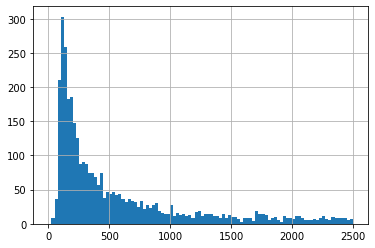

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings_per_movie.hist(bins=100, range=(0,2500))


In [38]:
# counts of ratings per anime as a df
ratings_per_user = RatingsTrain.groupby('userId')['rating'].count()
ratings_per_movie = RatingsTrain.groupby('movieId')['rating'].count()

ratings_per_movie_df = pd.DataFrame(ratings_per_movie)
# remove if < 1000 ratings
filtered_ratings_per_movie_df = ratings_per_movie_df[ratings_per_movie_df.rating >= 50]
# build a list of anime_ids to keep
popular_movie = filtered_ratings_per_movie_df.index.tolist()

# counts ratings per user as a df
ratings_per_user_df = pd.DataFrame(ratings_per_user)
# remove if < 500
filtered_ratings_per_user_df = ratings_per_user_df[ratings_per_user_df.rating >= 1000]
# build a list of user_ids to keep
prolific_users = filtered_ratings_per_user_df.index.tolist()

filtered_ratings = Ratings[Ratings.movieId.isin(popular_movie)]
filtered_ratings = Ratings[Ratings.userId.isin(prolific_users)]
len(filtered_ratings)



18783254

In [39]:
rating_matrix = filtered_ratings.pivot_table(index='userId', columns='movieId', values='rating')

rating_matrix = rating_matrix.fillna(0)

rating_matrix.head()



movieId,1,2,3,4,5,6,7,8,9,10,...,17761,17762,17763,17764,17765,17766,17767,17768,17769,17770
userId,,,,,,,,,,,,,,,,,,,,,
769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1333,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,4.0,3.0,1.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0
1442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,4.0
2455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0


In [40]:
rating_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,17761,17762,17763,17764,17765,17766,17767,17768,17769,17770
userId,,,,,,,,,,,,,,,,,,,,,
769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1333,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,4.0,3.0,1.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0
1442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,4.0
2455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
2648734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
2648869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.metrics.pairwise import cosine_similarity
import operator
def similar_users(user_id, matrix, movie_id, k=10):
    # create a df of just the current user
    user = matrix[matrix.index == user_id]
    
    # and a df of all other users
    other_users = matrix[matrix[movie_id] != 0]   

    # calc cosine similarity between user and each other user
    similarities = cosine_similarity(user,other_users)[0].tolist()
    
    # create list of indices of these users
    indices = other_users.index.tolist()
    
    # create key/values pairs of user index and their similarity
    index_similarity = dict(zip(indices, similarities))
    
    # sort by similarity
    index_similarity_sorted = sorted(index_similarity.items(), key=operator.itemgetter(1), reverse=True)
    
    # grab k users off the top
    return [u[0] for u in index_similarity_sorted[:k]]

In [42]:
def get_movie_rating(user_index, similar_user_indices, matrix, movie_id):    
    return matrix[matrix.index.isin(similar_user_indices)][movie_id].mean(axis=0)
    

In [39]:
i = 0
with open('data/parsed_qualifying.txt', 'r') as f:
    for l in f.readlines():
        row = l.strip().split(',')
        if rating_matrix[rating_matrix.index == int(row[1])].empty:
            continue
        
        similar_user_indices = similar_users(int(row[1]), rating_matrix, 
                                            movie_id=int(row[0]))
        rating = get_movie_rating(movie_id=int(row[0]), user_index=int(row[1]), 
                        similar_user_indices=similar_user_indices,
                        matrix=rating_matrix)
        print(row, rating)
        i = i + 1
        if i > 100:
            break


['1', '1830096', '2005-03-14'] 3.7
['1', '1687310', '2005-09-30'] 4.6
['1', '2460347', '2005-12-19'] 3.1
['10', '2640999', '2005-10-24'] 2.5
['10002', '1384113', '2005-12-31'] 4.2
['10003', '2257122', '2005-12-12'] 2.3
['10005', '862644', '2005-12-28'] 3.1
['10006', '364238', '2005-10-25'] 2.7
['1001', '433803', '2005-12-12'] 3.6
['1001', '342695', '2005-12-19'] 3.0
['1001', '1452454', '2005-12-21'] 3.0
['1001', '2498797', '2005-12-27'] 3.2
['1001', '29185', '2005-12-14'] 3.2
['1001', '2555614', '2005-12-29'] 3.4
['1001', '1183823', '2005-07-11'] 3.0
['1001', '440555', '2005-11-13'] 3.2
['1001', '696400', '2005-12-02'] 3.3
['1001', '684648', '2005-12-06'] 2.6
['10012', '718303', '2005-12-27'] 3.1
['10012', '2117885', '2005-11-28'] 3.4
['10012', '560599', '2005-12-27'] 1.4
['10013', '151330', '2005-12-19'] 3.2
['10013', '1696308', '2005-12-22'] 3.4
['10013', '2403533', '2005-12-27'] 3.0
['10013', '1856091', '2005-12-22'] 3.1
['10013', '1659198', '2005-10-29'] 3.0
['10013', '1892654', '2

In [73]:
def get_actual_rating(movie_id, user_id, ratings):
    return ratings[(ratings['userId'] == 30878) & (ratings['movieId'] == 1)]['rating']

In [ ]:
i = 0
with open('data/parsed_probe.txt', 'r') as f:
    for l in f.readlines():
        row = l.strip().split(',')
        if rating_matrix[rating_matrix.index == int(row[1])].empty:
            continue
        
        similar_user_indices = similar_users(int(row[1]), rating_matrix, 
                                            movie_id=int(row[0]))
        predicted_rating = get_movie_rating(movie_id=int(row[0]), user_index=int(row[1]), 
                        similar_user_indices=similar_user_indices,
                        matrix=rating_matrix)
        actual_rating = get_actual_rating(movie_id=int(row[0]), user_id=int(row[1]), ratings=Ratings)
        print(int(actual_rating), round(predicted_rating))
        print(predicted_rating, actual_rating)
        i = i + 1
        if i > 100:
            break
